### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import decomposition
from scipy import stats
from sklearn import cluster

matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

### Import Dataset

In [2]:
df = pd.read_csv('lapan1.csv')
df.head()

,Lintang (deg),Bujur (deg),Tanggal (dd/mm/yyy),Waktu Akuisisi (UTC),Tingkat Kepercayaan (%),Satelit,Kecamatan,Kabupaten,Provinsi
0,-3.115301,130.448975,2019-09-01,01:45:00,81,terra,Bula,Kab. Seram Bagian Timur,Maluku
1,-8.310713,124.637794,2019-09-01,01:45:00,90,terra,Alor Selatan,Kab. Alor,Nusa Tenggara Timur
2,2.063102,100.501610,2019-09-01,03:23:00,89,terra,Bagan Sinembah,Kab. Rokan Hilir,Riau
3,2.060687,100.518219,2019-09-01,03:23:00,100,terra,Bagan Sinembah,Kab. Rokan Hilir,Riau
4,2.058277,100.534790,2019-09-01,03:23:00,83,terra,Bagan Sinembah,Kab. Rokan Hilir,Riau


### Rename Columns

In [3]:
df.columns = ['lintang', 'bujur', 'tanggal', 'waktu', 'confidence', 'satelit',
                'kec','kab','prov']

### Pivot Table
Pivot some columns, they are : tanggal and waktu as index, prov as columns, and confidence as values.

In [4]:
pivot = df.pivot_table(index=['tanggal', 'waktu'],
                       columns='prov', 
                       values='confidence', aggfunc='mean')
pivot.head()

prov                  Aceh    Bali    Banten    Bengkulu    Di Yogyakarta   \
tanggal    waktu                                                             
2019-09-01 01:45:00     NaN     NaN       NaN         NaN              NaN   
           03:23:00     NaN     NaN       NaN         NaN              NaN   
           04:00:59     NaN     NaN       NaN         NaN              NaN   
           04:02:25     NaN     NaN       NaN         NaN              NaN   
           04:40:00     NaN     NaN       NaN         NaN              NaN   

prov                  Dki Jakarta    Gorontalo      Jambi    Jawa Barat   \
tanggal    waktu                                                           
2019-09-01 01:45:00            NaN          NaN        NaN           NaN   
           03:23:00            NaN          NaN  87.714286           NaN   
           04:00:59            NaN          NaN        NaN           NaN   
           04:02:25            NaN          NaN        NaN           NaN   
           04:40:00            NaN          NaN        NaN           NaN   

prov                  Jawa Tengah   ...   Papua Barat       Riau   \
tanggal    waktu                    ...                             
2019-09-01 01:45:00            NaN  ...            NaN        NaN   
           03:23:00            NaN  ...            NaN  89.588235   
           04:00:59            NaN  ...            NaN        NaN   
           04:02:25            NaN  ...            NaN        NaN   
           04:40:00            NaN  ...           88.0        NaN   

prov                  Sulawesi Barat    Sulawesi Selatan    Sulawesi Tengah   \
tanggal    waktu                                                               
2019-09-01 01:45:00               NaN                 NaN                NaN   
           03:23:00               NaN                 NaN                NaN   
           04:00:59               NaN                 NaN                NaN   
           04:02:25               NaN                 NaN                NaN   
           04:40:00               NaN                 NaN                NaN   

prov                  Sulawesi Tenggara    Sulawesi Utara    Sumatera Barat   \
tanggal    waktu                                                               
2019-09-01 01:45:00                  NaN               NaN               NaN   
           03:23:00                  NaN               NaN               NaN   
           04:00:59                  NaN               NaN               NaN   
           04:02:25                  NaN               NaN               NaN   
           04:40:00                  NaN               NaN               NaN   

prov                  Sumatera Selatan    Sumatera Utara   
tanggal    waktu                                           
2019-09-01 01:45:00                 NaN               NaN  
           03:23:00                86.0               NaN  
           04:00:59                 NaN               NaN  
           04:02:25                 NaN               NaN  
           04:40:00                 NaN               NaN  

[5 rows x 34 columns]

NaN values in the table representate zero hotspot, rather than dropping the row it will be much better if we fill it with 0 so we still can do some preprocessing to the table.

In [5]:
pivot = pivot.fillna(0)
pivot.head()

prov                  Aceh    Bali    Banten    Bengkulu    Di Yogyakarta   \
tanggal    waktu                                                             
2019-09-01 01:45:00     0.0     0.0       0.0         0.0              0.0   
           03:23:00     0.0     0.0       0.0         0.0              0.0   
           04:00:59     0.0     0.0       0.0         0.0              0.0   
           04:02:25     0.0     0.0       0.0         0.0              0.0   
           04:40:00     0.0     0.0       0.0         0.0              0.0   

prov                  Dki Jakarta    Gorontalo      Jambi    Jawa Barat   \
tanggal    waktu                                                           
2019-09-01 01:45:00            0.0          0.0   0.000000           0.0   
           03:23:00            0.0          0.0  87.714286           0.0   
           04:00:59            0.0          0.0   0.000000           0.0   
           04:02:25            0.0          0.0   0.000000           0.0   
           04:40:00            0.0          0.0   0.000000           0.0   

prov                  Jawa Tengah   ...   Papua Barat       Riau   \
tanggal    waktu                    ...                             
2019-09-01 01:45:00            0.0  ...            0.0   0.000000   
           03:23:00            0.0  ...            0.0  89.588235   
           04:00:59            0.0  ...            0.0   0.000000   
           04:02:25            0.0  ...            0.0   0.000000   
           04:40:00            0.0  ...           88.0   0.000000   

prov                  Sulawesi Barat    Sulawesi Selatan    Sulawesi Tengah   \
tanggal    waktu                                                               
2019-09-01 01:45:00               0.0                 0.0                0.0   
           03:23:00               0.0                 0.0                0.0   
           04:00:59               0.0                 0.0                0.0   
           04:02:25               0.0                 0.0                0.0   
           04:40:00               0.0                 0.0                0.0   

prov                  Sulawesi Tenggara    Sulawesi Utara    Sumatera Barat   \
tanggal    waktu                                                               
2019-09-01 01:45:00                  0.0               0.0               0.0   
           03:23:00                  0.0               0.0               0.0   
           04:00:59                  0.0               0.0               0.0   
           04:02:25                  0.0               0.0               0.0   
           04:40:00                  0.0               0.0               0.0   

prov                  Sumatera Selatan    Sumatera Utara   
tanggal    waktu                                           
2019-09-01 01:45:00                 0.0               0.0  
           03:23:00                86.0               0.0  
           04:00:59                 0.0               0.0  
           04:02:25                 0.0               0.0  
           04:40:00                 0.0               0.0  

[5 rows x 34 columns]

Some of the columns name cannot be processed because it has space, so we must rename it.

In [6]:
pivot = pivot.rename(columns = {' Kep. Bangka Belitung ':'Bangka Belitung', ' Kep. Riau ':'Riau'})

Because we got multiple index, we have to make both indexs as a general columns. After that, we join those two columns as one single column, tanggal_waktu.

In [7]:
pivot = pivot.reset_index(level=['tanggal', 'waktu'])
pivot.head()

prov,tanggal,waktu,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,...,Papua Barat,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara
0,2019-09-01,01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-09-01,03:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.714286,...,0.0,89.588235,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0
2,2019-09-01,04:00:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-09-01,04:02:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-09-01,04:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,88.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


join tanggal and waktu columns as tanggal_waktu

In [8]:
pivot['tanggal_waktu'] = pivot[['tanggal', 'waktu']].apply(lambda x: ' '.join(x), axis=1)
pivot.head()

prov,tanggal,waktu,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,...,Riau,Sulawesi Barat,Sulawesi Selatan,Sulawesi Tengah,Sulawesi Tenggara,Sulawesi Utara,Sumatera Barat,Sumatera Selatan,Sumatera Utara,tanggal_waktu
0,2019-09-01,01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01 01:45:00
1,2019-09-01,03:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.714286,...,89.588235,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,2019-09-01 03:23:00
2,2019-09-01,04:00:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01 04:00:59
3,2019-09-01,04:02:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01 04:02:25
4,2019-09-01,04:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01 04:40:00


Convert tanggal_waktu type to datetime

In [9]:
pivot['tanggal_waktu'] = pd.to_datetime(pivot['tanggal_waktu'])

create some useful columns related to time such as dayofweek, dayofmonth, etc for future process.

In [10]:
time = pd.to_datetime(pivot['tanggal_waktu'])
pivot['waktu_perhari'] = (time.dt.hour*60.0 + time.dt.minute)   / 60.0
pivot['dayofweek'] = time.dt.weekday
pivot['dayofmonth'] = time.dt.month
pivot['hourofweek'] = pivot['dayofweek']*24.0 + pivot['waktu_perhari']
pivot['weekofyear'] = time.dt.weekofyear
pivot['dayofyear'] = time.dt.dayofyear
pivot['hourofyear']    = pivot['dayofyear']*24.0 + pivot['waktu_perhari']
pivot.head()

prov,tanggal,waktu,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,...,Sumatera Selatan,Sumatera Utara,tanggal_waktu,waktu_perhari,dayofweek,dayofmonth,hourofweek,weekofyear,dayofyear,hourofyear
0,2019-09-01,01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,2019-09-01 01:45:00,1.750000,6,9,145.750000,35,244,5857.750000
1,2019-09-01,03:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.714286,...,86.0,0.0,2019-09-01 03:23:00,3.383333,6,9,147.383333,35,244,5859.383333
2,2019-09-01,04:00:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,2019-09-01 04:00:59,4.000000,6,9,148.000000,35,244,5860.000000
3,2019-09-01,04:02:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,2019-09-01 04:02:25,4.033333,6,9,148.033333,35,244,5860.033333
4,2019-09-01,04:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,2019-09-01 04:40:00,4.666667,6,9,148.666667,35,244,5860.666667


Because we don't need tanggal and waktu, we can drop it.

In [11]:
del pivot['tanggal']
del pivot['waktu']

Set column tanggal_waktu as index

In [12]:
pivot.set_index('tanggal_waktu', inplace=True)
pivot.head()

prov,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Sumatera Barat,Sumatera Selatan,Sumatera Utara,waktu_perhari,dayofweek,dayofmonth,hourofweek,weekofyear,dayofyear,hourofyear
tanggal_waktu,,,,,,,,,,,,,,,,,,,,,
2019-09-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.750000,6,9,145.750000,35,244,5857.750000
2019-09-01 03:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.714286,0.0,0.0,...,0.0,86.0,0.0,3.383333,6,9,147.383333,35,244,5859.383333
2019-09-01 04:00:59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,4.000000,6,9,148.000000,35,244,5860.000000
2019-09-01 04:02:25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,4.033333,6,9,148.033333,35,244,5860.033333
2019-09-01 04:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,4.666667,6,9,148.666667,35,244,5860.666667


In [13]:
df_reindexed = pivot.reindex(pd.date_range(start=pivot.index.min(),
                                                  end=pivot.index.max(),
                                                  freq='1H'))    

In [14]:
dfn = df_reindexed.interpolate(method='linear') 
dfn.head()

prov,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Sumatera Barat,Sumatera Selatan,Sumatera Utara,waktu_perhari,dayofweek,dayofmonth,hourofweek,weekofyear,dayofyear,hourofyear
2019-09-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.75,6.00,9.0,145.75,35.000,244.000,5857.75
2019-09-01 02:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.15,5.85,9.0,142.55,35.025,244.025,5858.75
2019-09-01 03:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.55,5.70,9.0,139.35,35.050,244.050,5859.75
2019-09-01 04:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.95,5.55,9.0,136.15,35.075,244.075,5860.75
2019-09-01 05:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.35,5.40,9.0,132.95,35.100,244.100,5861.75


For visualization purposes, we create date that representate each week of year. 

In [15]:
a=(dfn['2019-09-01 00:45:00':'2019-09-08 00:45:00'])
b=(dfn['2019-09-08 00:45:00':'2019-09-14 23:45:00'])
c=(dfn['2019-09-15 00:45:00':'2019-09-21 23:45:00'])
dfn_kuy = (pd.concat((a,b,c)))
dfn_kuy.head()

prov,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Sumatera Barat,Sumatera Selatan,Sumatera Utara,waktu_perhari,dayofweek,dayofmonth,hourofweek,weekofyear,dayofyear,hourofyear
2019-09-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.75,6.00,9.0,145.75,35.000,244.000,5857.75
2019-09-01 02:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.15,5.85,9.0,142.55,35.025,244.025,5858.75
2019-09-01 03:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.55,5.70,9.0,139.35,35.050,244.050,5859.75
2019-09-01 04:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.95,5.55,9.0,136.15,35.075,244.075,5860.75
2019-09-01 05:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.35,5.40,9.0,132.95,35.100,244.100,5861.75


In [18]:
dfn_kuy['weekofyear']['2019-09-01 00:45:00':'2019-09-08 00:45:00'] = 35.0 #tanggal 1 - 7 minggu ke 35
dfn_kuy['weekofyear']['2019-09-08 00:45:00':'2019-09-14 23:45:00'] = 36.0 # tanggal 8 - 14 minggu ke 36
dfn_kuy['weekofyear']['2019-09-15 00:45:00':'2019-09-21 23:45:00'] = 37.0 # tanggal 15 - 21 minggu ke 37
dfn = dfn_kuy

In [19]:
dfn

prov,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Sumatera Barat,Sumatera Selatan,Sumatera Utara,waktu_perhari,dayofweek,dayofmonth,hourofweek,weekofyear,dayofyear,hourofyear
2019-09-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,1.750000,6.000000,9.0,145.75,35.0,244.000000,5857.75
2019-09-01 02:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,2.150000,5.850000,9.0,142.55,35.0,244.025000,5858.75
2019-09-01 03:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,2.550000,5.700000,9.0,139.35,35.0,244.050000,5859.75
2019-09-01 04:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,2.950000,5.550000,9.0,136.15,35.0,244.075000,5860.75
2019-09-01 05:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,3.350000,5.400000,9.0,132.95,35.0,244.100000,5861.75
2019-09-01 06:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,3.750000,5.250000,9.0,129.75,35.0,244.125000,5862.75
2019-09-01 07:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,4.150000,5.100000,9.0,126.55,35.0,244.150000,5863.75
2019-09-01 08:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,4.550000,4.950000,9.0,123.35,35.0,244.175000,5864.75
2019-09-01 09:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,4.950000,4.800000,9.0,120.15,35.0,244.200000,5865.75
2019-09-01 10:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,5.350000,4.650000,9.0,116.95,35.0,244.225000,5866.75


Create zscore

Z-score digunakan untuk mengambil sampel dalam satu set data atau untuk menentukan berapa jumlah standar deviasi di atas atau di bawah mean.. Untuk mencari Z-score suatu sampel, Anda harus mencari dulu mean, varian, dan standar deviasinya.

In [20]:
col = [' Aceh ', ' Bali ', ' Banten ', ' Bengkulu ',
                               ' Di Yogyakarta ', ' Dki Jakarta ', ' Gorontalo ', ' Jambi ',
                               ' Jawa Barat ', ' Jawa Tengah ', ' Jawa Timur ', ' Kalimantan Barat ',
                               ' Kalimantan Selatan ', ' Kalimantan Tengah ', ' Kalimantan Timur ', 
                               ' Kalimantan Utara ','Bangka Belitung', 'Riau',
                               ' Lampung ', ' Maluku ', ' Maluku Utara ', ' Nusa Tenggara Barat ', 
                               ' Nusa Tenggara Timur ', ' Papua ', ' Papua Barat ', ' Riau ', 
                               ' Sulawesi Tenggara ', ' Sulawesi Barat ', ' Sulawesi Selatan ',
                               ' Sulawesi Tengah ', ' Sulawesi Utara ', ' Sumatera Barat ',
                               ' Sumatera Selatan ', ' Sumatera Utara ']
for i in col:
    dfn[i].apply(lambda x: x if np.std(x) == 0 else zscore(x))

In [21]:
hotspot_attribute = np.array(dfn.loc[:,[' Aceh ', ' Bali ', ' Banten ', ' Bengkulu ',
                               ' Di Yogyakarta ', ' Dki Jakarta ', ' Gorontalo ', ' Jambi ',
                               ' Jawa Barat ', ' Jawa Tengah ', ' Jawa Timur ', ' Kalimantan Barat ',
                               ' Kalimantan Selatan ', ' Kalimantan Tengah ', ' Kalimantan Timur ', 
                               ' Kalimantan Utara ','Bangka Belitung', 'Riau',
                               ' Lampung ', ' Maluku ', ' Maluku Utara ', ' Nusa Tenggara Barat ', 
                               ' Nusa Tenggara Timur ', ' Papua ', ' Papua Barat ', ' Riau ', 
                               ' Sulawesi Tenggara ', ' Sulawesi Barat ', ' Sulawesi Selatan ',
                               ' Sulawesi Tengah ', ' Sulawesi Utara ', ' Sumatera Barat ',
                               ' Sumatera Selatan ', ' Sumatera Utara ']])

In [22]:
mean_ha = hotspot_attribute.mean(axis=0)
std_ha  = hotspot_attribute.std(axis=0)

In [23]:
hotspot_attribute

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        63.6952381 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        64.53333333,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        65.37142857,  0.        ]])

### Elbow Methods

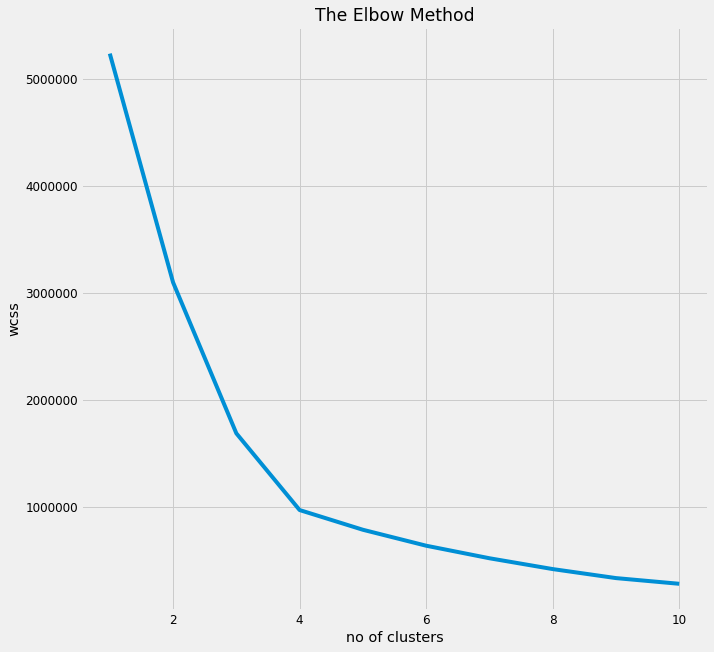

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(hotspot_attribute)
    wcss.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
#plt.figure(figsize=[150,150])
plt.show()

### K-Means 

(0, 5)

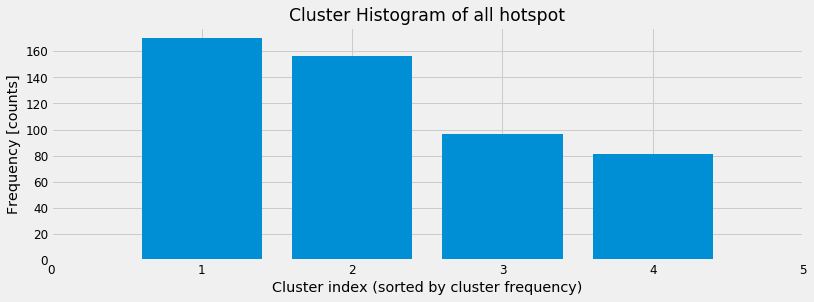

In [25]:
numClusters = 4
hotspot_kmeans = cluster.MiniBatchKMeans(n_clusters=numClusters, batch_size=120000, n_init=100, random_state=1)
clusterInds = hotspot_kmeans.fit_predict(hotspot_attribute)

clusterTotalCounts, _ = np.histogram(clusterInds, bins=numClusters)
sortedClusterInds = np.flipud(np.argsort(clusterTotalCounts))

plt.figure(figsize=(12,4)); plt.title('Cluster Histogram of all hotspot')
plt.bar(range(1,numClusters+1),clusterTotalCounts[sortedClusterInds])
plt.ylabel('Frequency [counts]'); plt.xlabel('Cluster index (sorted by cluster frequency)')
plt.xlim(0,numClusters+1)

In [26]:
clusterInds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Feature Importance using K-Means Cluster

We do this step to know provinces in every cluster

In [27]:
cat1 = clusterInds.copy()
cat2 = clusterInds.copy()
cat3 = clusterInds.copy()
cat4 = clusterInds.copy()

In [28]:
cat1[cat1==0] =5
cat1[cat1<5] = 0
cat1[cat1==5] =1

In [29]:
cat2[cat2==0] =5
cat2[cat2<5] = 0
cat2[cat2==5] =1

cat3[cat3==0] =5
cat3[cat3<5] = 0
cat3[cat3==5] =1

cat4[cat4==0] =5
cat4[cat4<5] = 0
cat4[cat4==5] =1

In [30]:
cat = hotspot_kmeans.__dict__['cluster_centers_']

### Cluster 1

In [31]:
catt1 = []
for i,j in enumerate(cat[0]):
    if j>0:
        catt1.append((i,j))
from operator import itemgetter
catt1des = sorted(catt1,key=itemgetter(1))
catt1des = catt1des[::-1]
for i in catt1des:
    print(dfn.columns[i[0]])

 Kalimantan Selatan 
 Kalimantan Timur 
 Kalimantan Tengah 
 Kalimantan Barat 
 Jambi 
 Maluku 
 Sulawesi Utara 
 Sulawesi Tengah 


### Cluster 2

In [32]:
catt2 = []
for i,j in enumerate(cat[1]):
    if j>0:
        catt2.append((i,j))
from operator import itemgetter
catt2des = sorted(catt2,key=itemgetter(1))
catt2des = catt2des[::-1]
for i in catt2des:
    print(dfn.columns[i[0]])

 Kalimantan Barat 
 Sulawesi Tengah 
 Kalimantan Tengah 
 Kalimantan Selatan 
 Kalimantan Timur 
 Jawa Timur 
 Jawa Tengah 
 Kalimantan Utara 
 Sumatera Selatan 
 Nusa Tenggara Barat 
 Jambi 
 Maluku 


### Cluster 3

In [33]:
catt3 = []
for i,j in enumerate(cat[2]):
    if j>0:
        catt3.append((i,j))
from operator import itemgetter
catt3des = sorted(catt3,key=itemgetter(1))
catt3des = catt3des[::-1]
for i in catt3des:
    print(dfn.columns[i[0]])

 Maluku 
 Kalimantan Selatan 
 Kalimantan Tengah 
 Kalimantan Timur 
 Kalimantan Barat 
 Jambi 
 Nusa Tenggara Timur 
 Sulawesi Tengah 
 Jawa Timur 
 Sulawesi Utara 
 Jawa Tengah 
 Kalimantan Utara 


### Cluster 4

In [34]:
catt4 = []
for i,j in enumerate(cat[3]):
    if j>0:
        catt4.append((i,j))
from operator import itemgetter
catt4des = sorted(catt4,key=itemgetter(1))
catt4des = catt4des[::-1]
for i in catt4des:
    print(dfn.columns[i[0]])

 Kalimantan Tengah 
 Kalimantan Timur 
 Kalimantan Selatan 
 Sulawesi Utara 
 Sulawesi Tengah 
 Kalimantan Barat 
 Jambi 
 Nusa Tenggara Timur 
 Maluku 


### PCA

In [35]:
#%% let's apply PCA to reduce the dimentionality from 80 dimentional distribution vector 
# to something more managble such as 3 dimentions

hoursOfYear = np.sort(dfn['hourofyear'].astype(int).unique())
clusterDistributionHourOfYear = np.zeros((len(range(hoursOfYear[0],hoursOfYear[-1])),numClusters))
dayOfYearVec  = np.zeros(clusterDistributionHourOfYear.shape[0])
weekdayVec    = np.zeros(clusterDistributionHourOfYear.shape[0])
weekOfYearVec = np.zeros(clusterDistributionHourOfYear.shape[0])
for k, hour in enumerate(hoursOfYear[:-1]):
    slectedInds = dfn['hourofyear'].astype(int) == hour
    currDistribution, _ = np.histogram(clusterInds[slectedInds], bins=numClusters)
#     print(currDistribution[sortedClusterInds].shape)
    clusterDistributionHourOfYear[k,:] = currDistribution[sortedClusterInds]
    
    dayOfYearVec[k]  = dfn[slectedInds]['dayofyear'].mean()
    weekdayVec[k]    = dfn[slectedInds]['dayofweek'].mean()
    weekOfYearVec[k] = dfn[slectedInds]['weekofyear'].mean()

In [36]:
numComponents = 4
TripDistributionPCAModel = decomposition.PCA(n_components=numComponents,whiten=True, random_state=1)
compactClusterDistributionHourOfYear = TripDistributionPCAModel.fit_transform(hotspot_attribute)

### Hotspot Distribution during Weekday

Text(0, 0.5, 'Hour of Day')

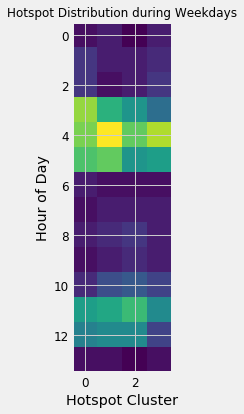

In [37]:
# calculate the trip distribution for different hours of the weekday
hoursOfDay = np.sort(pivot['waktu_perhari'].astype(int).unique())
clusterDistributionHourOfDay_weekday = np.zeros((len(hoursOfDay),numClusters))
for k, hour in enumerate(hoursOfDay):
    slectedInds = (pivot['waktu_perhari'].astype(int) == hour) & (pivot['dayofweek'] <= 4)

    currDistribution, _ = np.histogram(clusterInds[slectedInds[:504]], bins=numClusters)
    clusterDistributionHourOfDay_weekday[k,:] = currDistribution[sortedClusterInds]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))
ax.set_title('Hotspot Distribution during Weekdays', fontsize=12)
ax.imshow(clusterDistributionHourOfDay_weekday); ax.grid('off')
ax.set_xlabel('Hotspot Cluster'); ax.set_ylabel('Hour of Day')
# ax.annotate('Silent Nights', color='r', fontsize=15, xy=(52, 2), xytext=(58, 1.75),
#             arrowprops=dict(facecolor='red', shrink=0.03))

### Hotspot Distribution during Weekend

Text(0, 0.5, 'Hour of Day')

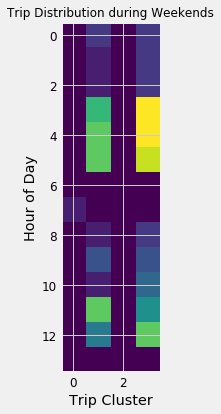

In [38]:
# calculate the trip distribution for different hours of the weekend
hoursOfDay = np.sort(pivot['waktu_perhari'].astype(int).unique())
clusterDistributionHourOfDay_weekend = np.zeros((len(hoursOfDay),numClusters))
for k, hour in enumerate(hoursOfDay):
    slectedInds = (pivot['waktu_perhari'].astype(int) == hour) & (pivot['dayofweek'] >= 5)
    currDistribution, _ = np.histogram(clusterInds[slectedInds[:504]], bins=numClusters)
    clusterDistributionHourOfDay_weekend[k,:] = currDistribution[sortedClusterInds]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))
ax.set_title('Trip Distribution during Weekends', fontsize=12)
ax.imshow(clusterDistributionHourOfDay_weekend); ax.grid('off')
ax.set_xlabel('Trip Cluster'); ax.set_ylabel('Hour of Day')
# ax.annotate('Party Nights', color='r', fontsize=15, xy=(52, 2), xytext=(58, 1.75),
#             arrowprops=dict(facecolor='red', shrink=0.03))
# ax.annotate('Late Mornings', color='r', fontsize=15, xy=(45, 10), xytext=(58, 9.75),
#             arrowprops=dict(facecolor='red', shrink=0.03))

### Visualize PCA Coefficient during the week

(167, 4, 3)


(-0.9, 167)

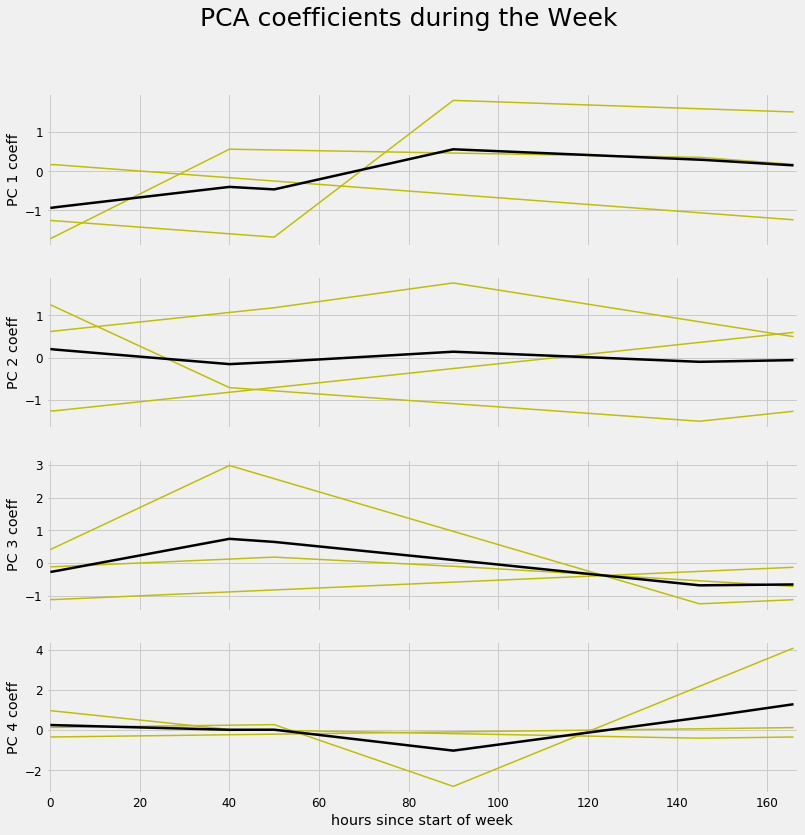

In [39]:
# collect traces for all weeks of year
listOfFullWeeks = [35.0, 36.0, 37.0]
# for uniqueVal in np.unique(weekOfYearVec):
#     print((weekOfYearVec == uniqueVal).sum())
#     if (weekOfYearVec == uniqueVal).sum() == 24*7:
#         listOfFullWeeks.append(uniqueVal)

weeklyTraces = np.zeros((167,numComponents,len(listOfFullWeeks)))
print(weeklyTraces.shape)
for k, weekInd in enumerate(listOfFullWeeks):
    weeklyTraces[:,:,k] = compactClusterDistributionHourOfYear[:502][weekOfYearVec == weekInd,:][:167]

fig, axArray = plt.subplots(nrows=numComponents,ncols=1,sharex=True, figsize=(12,12))
fig.suptitle('PCA coefficients during the Week', fontsize=25)
for PC_coeff in range(numComponents):
    meanTrace = weeklyTraces[:,PC_coeff,:].mean(axis=1)
    axArray[PC_coeff].plot(weeklyTraces[:,PC_coeff,:],'y',linewidth=1.5)
    axArray[PC_coeff].plot(meanTrace,'k',linewidth=2.5)
    axArray[PC_coeff].set_ylabel('PC %d coeff' %(PC_coeff+1))
#     axArray[PC_coeff].vlines([0,23,47], weeklyTraces[:,PC_coeff,:].min(), weeklyTraces[:,PC_coeff,:].max(), colors='r', lw=2)
    
axArray[PC_coeff].set_xlabel('hours since start of week')
axArray[PC_coeff].set_xlim(-0.9,167,-0.1)

In yellow is the data from all full weeks overlain on top of each other. In black are the average traces.

We can clearly see the periodicity here as well as the difference between the regular weekdays and the weekends.

In [47]:
dfn

prov,Aceh,Bali,Banten,Bengkulu,Di Yogyakarta,Dki Jakarta,Gorontalo,Jambi,Jawa Barat,Jawa Tengah,...,Sumatera Barat,Sumatera Selatan,Sumatera Utara,waktu_perhari,dayofweek,dayofmonth,hourofweek,weekofyear,dayofyear,hourofyear
2019-09-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,1.750000,6.000000,9.0,145.75,35.0,244.000000,5857.75
2019-09-01 02:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,2.150000,5.850000,9.0,142.55,35.0,244.025000,5858.75
2019-09-01 03:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,2.550000,5.700000,9.0,139.35,35.0,244.050000,5859.75
2019-09-01 04:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,2.950000,5.550000,9.0,136.15,35.0,244.075000,5860.75
2019-09-01 05:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,3.350000,5.400000,9.0,132.95,35.0,244.100000,5861.75
2019-09-01 06:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,3.750000,5.250000,9.0,129.75,35.0,244.125000,5862.75
2019-09-01 07:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,4.150000,5.100000,9.0,126.55,35.0,244.150000,5863.75
2019-09-01 08:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,4.550000,4.950000,9.0,123.35,35.0,244.175000,5864.75
2019-09-01 09:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,4.950000,4.800000,9.0,120.15,35.0,244.200000,5865.75
2019-09-01 10:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,5.350000,4.650000,9.0,116.95,35.0,244.225000,5866.75


In [41]:
import plotly.express as px

In [56]:
fig = px.line(dfn, x="hourofweek", y=" Kalimantan Selatan ", title='Hotspot in Kalimantan Selatan')
fig.show()